# Medical Cost Personal Insurance Project

Importing Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn .model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [97]:
ins=pd.read_csv("medicalcost.csv")
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#Observation:
    The dataset contains 1338 data points with 6 independent features(age, sex, bmi, children, smoker, region) and 1 target  
    feature(charges)

In [98]:
ins.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [99]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [100]:
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#Observation:
There are two integer dtypes, two float dtypes and three object dtypes

In [101]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#Summary:
From the above description we can analyse that
The dataset is of 1338 people and it is descriptive analysis for age, bmi, children, and charges

Age: The youngest person is 18 years old and the oldest person is 64 years old. The average age is 39 years old. 
     The standard deviation is 14.05 years. Thus it is spread out by 14.05 years above and below the average age of 39 years   
     
BMI: The minimum BMI is 15.96 and the maximum is 53.13. The average BMI is 30.4.
     The standard deviation is 6.10. Thus it is spread out by 6.10 units above and below the average BMI of 30.66.
     
Children: The least number of children a person has 0 and the most is 5. The average number of children is 1.09. 
          The standard deviation is 1.21. Thus the number of children per person in the dataset is spread out by 1.21 children  
          above and below the average of 1.00 children.


Charges: The minimum charges are $1121.87 and the maximum are $63770.43. The average medical charges is $9382.03. 
         The standard deviation is 12110.01. Thus the charges in the dataset are spread out by 12110.01 units above and below  
         the average charge of 13270.42.

In [102]:
ins.shape

(1338, 7)

In [103]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [104]:
ins.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Exploratory Data Analysis

In [105]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

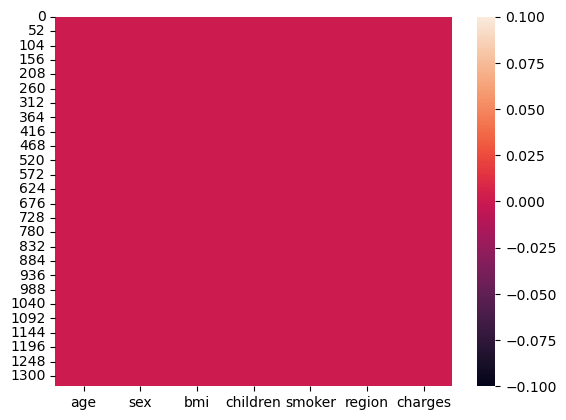

In [106]:
sns.heatmap(ins.isnull())

In [107]:
ins.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

Observation: As Skewness is a measure of how symmetric the distribution of a dataset is. Thus,

The Age with 0.055673 is slightly a positive skew and shows a distribution that's tailing off slightly to the right.That means there might be a few more people older than the average age compared to younger than the average age.

The BMI with 0.284047 is a positive skew indicates a slightly longer tail towards higher BMI.

The Children with 0.938380 is a positive skew indiactes that there might be more people with a higher number of children than with a lower number of children.

The Charges with 1.515880 is a high positive skew indicates a distribution that's skewed to the right and there could be a few outliers with very high charges compared to the rest of the data.

<Axes: xlabel='age', ylabel='Density'>

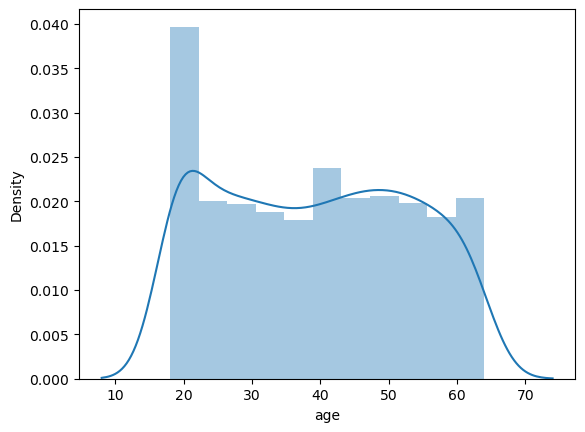

In [108]:
sns.distplot(ins['age'])

<Axes: xlabel='bmi', ylabel='Density'>

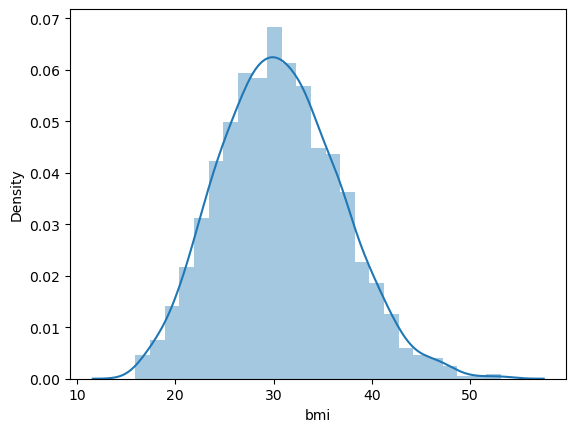

In [109]:
sns.distplot(ins['bmi'])

<Axes: xlabel='children', ylabel='Density'>

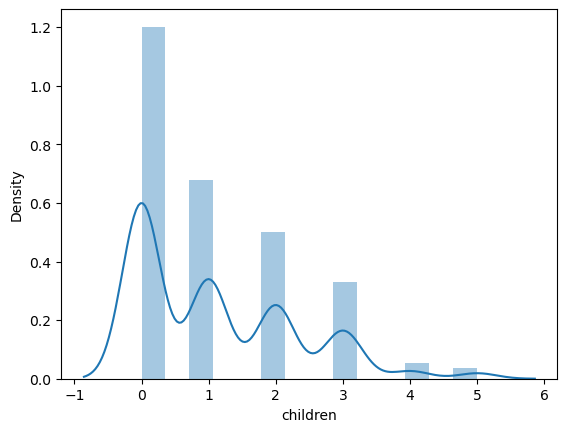

In [110]:
sns.distplot(ins['children'])

<Axes: xlabel='charges', ylabel='Density'>

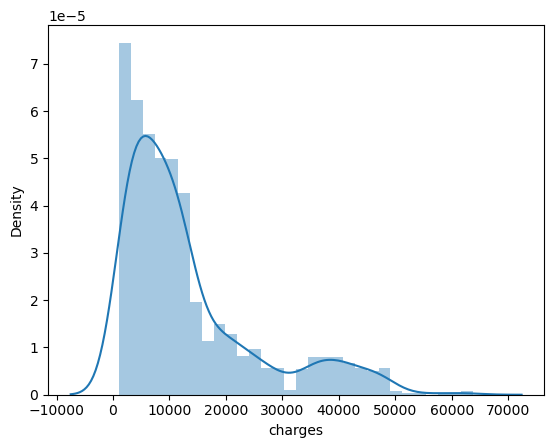

In [111]:
sns.distplot(ins['charges'])

<Axes: xlabel='sex', ylabel='charges'>

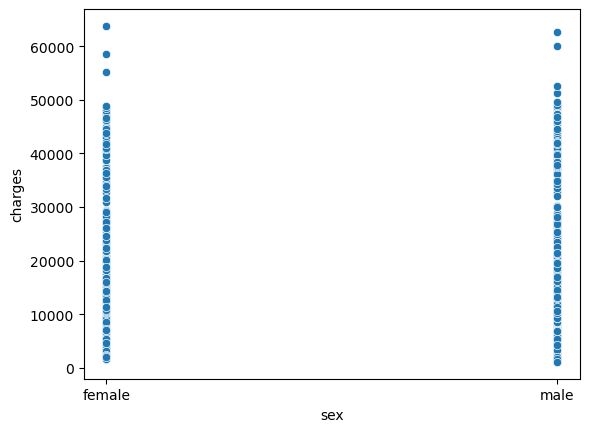

In [112]:
sns.scatterplot(data=ins,x='sex',y='charges')

<Axes: xlabel='children', ylabel='charges'>

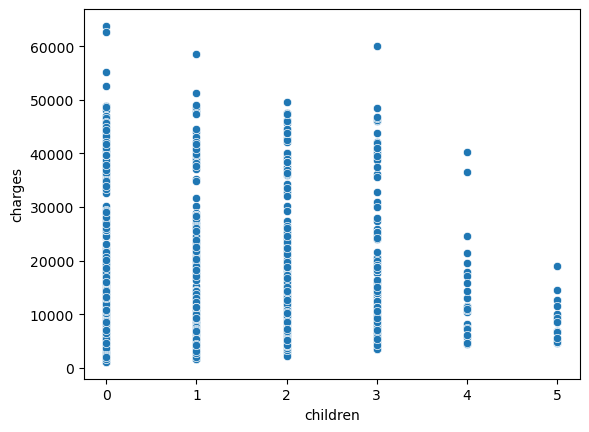

In [113]:
sns.scatterplot(data=ins,x='children',y='charges')

<Axes: xlabel='smoker', ylabel='charges'>

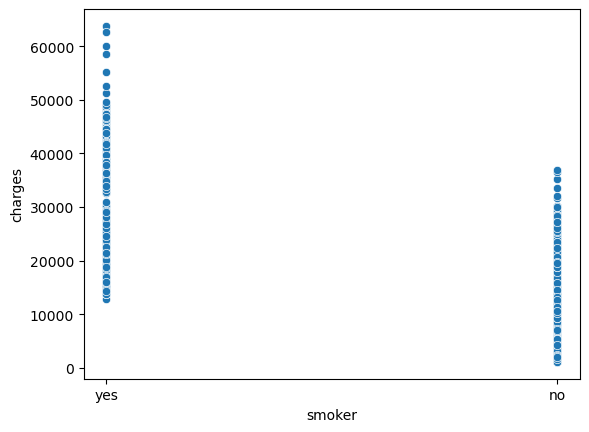

In [114]:
sns.scatterplot(data=ins,x='smoker',y='charges')

<Axes: xlabel='region', ylabel='charges'>

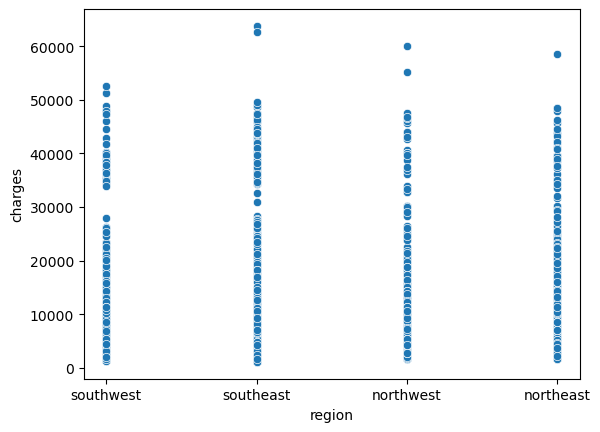

In [115]:
sns.scatterplot(data=ins,x='region',y='charges')

Observations: Females are charged a little less as compared to the males Smokers are charged more than thrice as compared to non-smokers Southeast region people are charged a little more compared to the other three regions

<Axes: xlabel='age', ylabel='charges'>

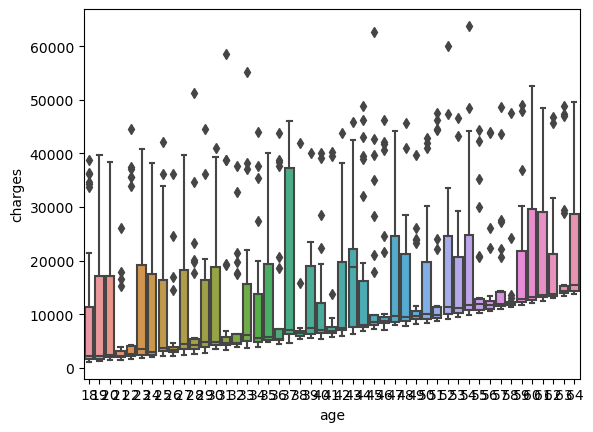

In [116]:
sns.boxplot(data=ins, x='age', y='charges')

Observation: Charges are incresing with the increase in the age

In [117]:
ins["age"].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [118]:
ins['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [119]:
ins['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [120]:
ins['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [121]:
ins['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [122]:
ins['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

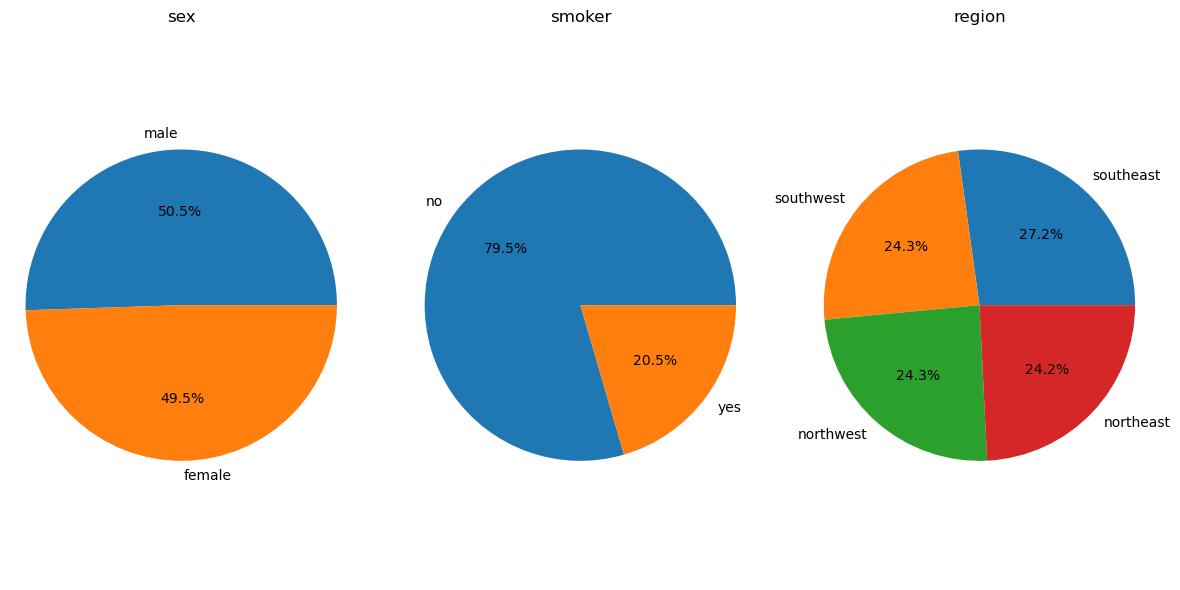

In [123]:
features = ['sex', 'smoker', 'region']
fig, axes = plt.subplots(1, len(features), figsize=(12, 6))

for i, col in enumerate(features):
    x = ins[col].value_counts()
    axes[i].pie(x.values, labels=x.index, autopct='%1.1f%%')
    axes[i].set_title(col)
    axes[i].axis('equal')  
plt.tight_layout()
plt.show()

#  Data Cleaning

<Axes: >

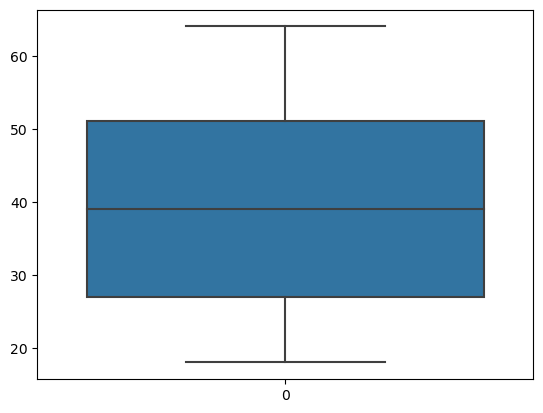

In [124]:
ins.drop_duplicates(inplace=True)
sns.boxplot(ins['age'])

<Axes: >

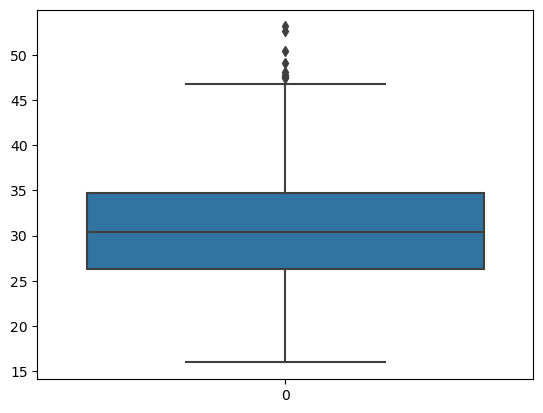

In [125]:
ins.drop_duplicates(inplace=True)
sns.boxplot(ins['bmi'])

<Axes: >

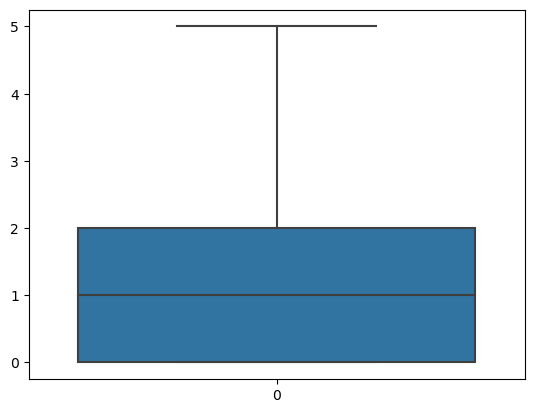

In [126]:
ins.drop_duplicates(inplace=True)
sns.boxplot(ins['children'])

Observation: Outliers are present in BMI, that must be removed

In [129]:
Q1=ins['bmi'].quantile(0.25)
Q2=ins['bmi'].quantile(0.5)
Q3=ins['bmi'].quantile(0.75)
iqr=Q3-Q1
lower=Q1-1.5*iqr
upper=Q3+1.5*iqr
print(lower)
print(upper)


13.674999999999994
47.31500000000001


In [130]:
upper_array = np.where(ins['bmi'] >= upper)[0]
lower_array = np.where(ins['bmi'] <= lower)[0]

ins.drop(index=upper_array, inplace=True)
ins.drop(index=lower_array, inplace=True)
 
print("New Shape: ", ins.shape)

New Shape:  (1328, 7)


In [131]:
outliers=ins[(ins['bmi'] > 47.31) | (ins['bmi'] < 13.67)]

In [132]:
ins['bmi'].skew()

0.24782854669880128

In [133]:
print("Mean value of bmi",ins['bmi'].mean())
print("Standard deviation of bmi",ins['bmi'].std())
print("Minimum value of bmi",ins['bmi'].min())
print("Maximum value of bmi",ins['bmi'].max())

Mean value of bmi 30.621577560240965
Standard deviation of bmi 6.036785041708663
Minimum value of bmi 15.96
Maximum value of bmi 53.13


In [134]:
print("Upper limit",ins['bmi'].mean() + 3*ins['bmi'].std())
print("Lower limit",ins['bmi'].mean() - 3*ins['bmi'].std())

Upper limit 48.73193268536696
Lower limit 12.511222435114973


In [135]:
ins[(ins['bmi'] > 48.96) | (ins['bmi'] < 12.36)]

,age,sex,bmi,children,smoker,region,charges
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [136]:
ins.shape

(1328, 7)

In [137]:
upper_limit = ins['bmi'].mean() + 3*ins['bmi'].std()
lower_limit = ins['bmi'].mean() - 3*ins['bmi'].std()
ins['bmi'] = np.where(ins['bmi']>upper_limit,upper_limit,
             np.where(ins['bmi']<lower_limit,lower_limit,ins['bmi']))

In [138]:
ins['bmi'].describe()

count    1328.000000
mean       30.614127
std         6.012061
min        15.960000
25%        26.272500
50%        30.332500
75%        34.618750
max        48.731933
Name: bmi, dtype: float64

In [139]:
ins.shape, ins[ins['bmi']<45].shape
ins = ins[ins['bmi']<50]
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [140]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(ins['bmi']))
print(z)

0       0.451617
1       0.525121
2       0.396997
3       1.316039
4       0.288550
          ...   
1333    0.059215
1334    0.217291
1335    1.037618
1336    0.801047
1337    0.256935
Name: bmi, Length: 1328, dtype: float64


# Encoding

In [141]:
from sklearn import preprocessing 

le = preprocessing.LabelEncoder() 
ins['sex']=le.fit_transform(ins['sex'])
list1=['sex','smoker','region']
for val in list1:
    ins[val]=le.fit_transform(ins[val].astype(str))
ins

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [142]:
ins.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.022333,0.104105,0.044164,-0.025542,0.001210,0.298232
sex,-0.022333,1.000000,0.044802,0.018471,0.078492,0.003955,0.060984
bmi,0.104105,0.044802,1.000000,0.014193,0.001612,0.161239,0.194646
children,0.044164,0.018471,0.014193,1.000000,0.007194,0.018419,0.069678
smoker,-0.025542,0.078492,0.001612,0.007194,1.000000,-0.002372,0.787313
region,0.001210,0.003955,0.161239,0.018419,-0.002372,1.000000,-0.007255
charges,0.298232,0.060984,0.194646,0.069678,0.787313,-0.007255,1.000000


<Axes: >

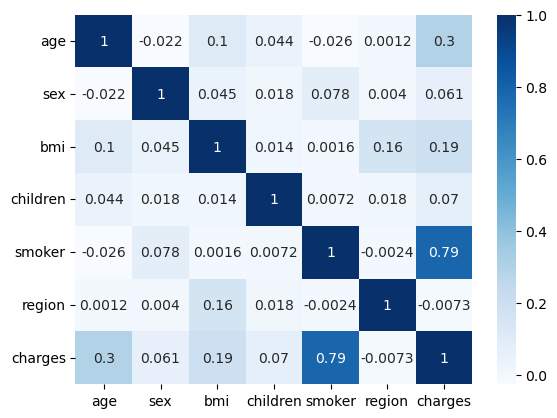

In [143]:
sns.heatmap(ins.corr(),cmap='Blues',annot=True)

# Developing the Model

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings ('ignore')

In [145]:
x=ins.iloc[:,0:-1]
y=ins.iloc[:,-1]

In [146]:
x.shape

(1328, 6)

In [147]:
y.shape

(1328,)

In [148]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [149]:
xtrain.shape

(1062, 6)

In [150]:
xtest.shape

(266, 6)

In [151]:
ytrain.shape

(1062,)

In [152]:
ytest.shape

(266,)

Linear Regression

In [154]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [156]:
lm.coef_

array([  260.90059667,   -93.23752531,   339.45729723,   542.85957153,
       23801.71103381,  -529.78583111])

In [157]:
lm.intercept_

-12032.491279430882

In [158]:
lm.score(xtrain,ytrain)

0.7510673251515441

In [159]:
pred=lm.predict(xtest)
print("Predicted result insurance cost:",pred)
print("Actual cost",ytest)

Predicted result insurance cost: [ 7.76051047e+03  1.32350884e+04  1.04145462e+04  7.79322105e+03
  4.08962417e+03  1.33215498e+04  8.22655393e+03  6.60066816e+03
  3.60813626e+03  1.74051584e+04  2.44136620e+03  3.01614014e+04
  5.43329007e+03  3.25005885e+04  5.06145536e+03  1.23856346e+04
  1.04326916e+04  5.86949723e+03  1.11396066e+04  2.83165485e+04
  7.95350387e+03  8.98035490e+03  8.27464748e+03  3.33947358e+04
  3.77152733e+01  1.28737685e+04  7.84464420e+03  8.24731993e+03
  8.43984119e+03  2.82697063e+04  7.19364434e+03  6.71759626e+03
  4.34427707e+03  3.43242138e+04  5.10537628e+03  7.29815396e+03
  6.53147433e+03  3.63475588e+03  3.85228026e+02  3.69185459e+04
  4.77738386e+03 -1.12045788e+03  7.21941956e+03  5.41830347e+03
  1.11483458e+04  8.97400126e+03  1.53096116e+04  4.59857314e+03
  1.53434865e+04  3.44693718e+04 -4.86154254e+02  4.26914433e+03
  1.17429931e+04  2.14597842e+03  3.06402326e+04  9.60308525e+02
  2.64261905e+03  1.47815593e+04  1.09082463e+04  2.47806

In [160]:
print ('Mean Absolute Error:',mean_absolute_error(ytest,pred))
print ('Mean Squared Error:',mean_squared_error(ytest,pred))
print ('Root Mean Squared Error:',np.sqrt(mean_absolute_error(ytest,pred)))

Mean Absolute Error: 4160.0950723143405
Mean Squared Error: 35995558.324642874
Root Mean Squared Error: 64.49879899900726


In [161]:
print(cross_val_score(lm,x,y,cv=5,).mean())

0.7477054514658799


In [162]:
from sklearn.metrics import r2_score
print(r2_score(ytest,pred))

0.7474948148490772
